# Plot of BDY sections

## 1. Importing external modules

In [1]:
## magics

%load_ext version_information 
%version_information numpy,xarray,netCDF4

Software versions
Python 2.7.11 64bit [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
IPython 4.2.0
OS Linux 3.16.0 4 amd64 x86_64 with debian 8.5
numpy 1.11.1
xarray 0.9.1
netCDF4 1.2.4
Thu May 04 14:57:09 2017 CEST

In [2]:
## path for mdules

import sys
sys.path.insert(0,"/home/albert/lib/python")

In [3]:
## imports

import numpy as np
import dask
import xarray as xr
import GriddedData
import time

In [4]:
#- Other modules
import os
from glob import glob
import numpy.ma as ma
import scipy as sc
import WavenumberSpectrum as ws
import dask.array as da
from netCDF4 import Dataset

### palette
from matplotlib.colors import LogNorm
import matplotlib.cm as mplcm
import colormap as cmaps
import matplotlib.cm as cm

import seaborn as sns

seq_cmap = mplcm.Blues
div_cmap = mplcm.seismic

### quick plot
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

## local/specific imports
import oocgcm
import oocgcm.filtering
import oocgcm.filtering.linearfilters as tf
%matplotlib inline

## 2. Dataset

In [10]:
dir="/media/extra/DATA/NACHOS12/BDY/"
NbdyUfile="GLORYS2V3-NACHOS12.L75_NbdyU_y2010.nc"
SbdyUfile="GLORYS2V3-NACHOS12.L75_SbdyU_y2010.nc"
NbdyVfile="GLORYS2V3-NACHOS12.L75_NbdyV_y2010.nc"
SbdyVfile="GLORYS2V3-NACHOS12.L75_SbdyV_y2010.nc"

tNbdyUfile=dir+NbdyUfile
tSbdyUfile=dir+SbdyUfile
tNbdyVfile=dir+NbdyVfile
tSbdyVfile=dir+SbdyVfile

!ls $tNbdyUfile
!ls $tSbdyUfile
!ls $tNbdyVfile
!ls $tSbdyVfile

/media/extra/DATA/NACHOS12/BDY/GLORYS2V3-NACHOS12.L75_NbdyU_y2010.nc
/media/extra/DATA/NACHOS12/BDY/GLORYS2V3-NACHOS12.L75_SbdyU_y2010.nc
/media/extra/DATA/NACHOS12/BDY/GLORYS2V3-NACHOS12.L75_NbdyV_y2010.nc
/media/extra/DATA/NACHOS12/BDY/GLORYS2V3-NACHOS12.L75_SbdyV_y2010.nc


In [13]:
NbdyU=xr.open_dataset(tNbdyUfile)
SbdyU=xr.open_dataset(tSbdyUfile)
NbdyV=xr.open_dataset(tNbdyVfile)
SbdyV=xr.open_dataset(tSbdyVfile)

In [31]:
NU= NbdyU['vozocrtx']
SU= SbdyU['vozocrtx']
NV= NbdyV['vomecrty']
SV= SbdyV['vomecrty']

Nlon=np.array(NbdyU['nav_lon']).squeeze()
Udepth=-1*NbdyU['depthu']
Slon=np.array(SbdyU['nav_lon']).squeeze()
Vdepth=-1*NbdyV['depthv']



In [29]:
Nlon.shape
Udepth.shape
NU.shape

(12, 75, 1, 941)

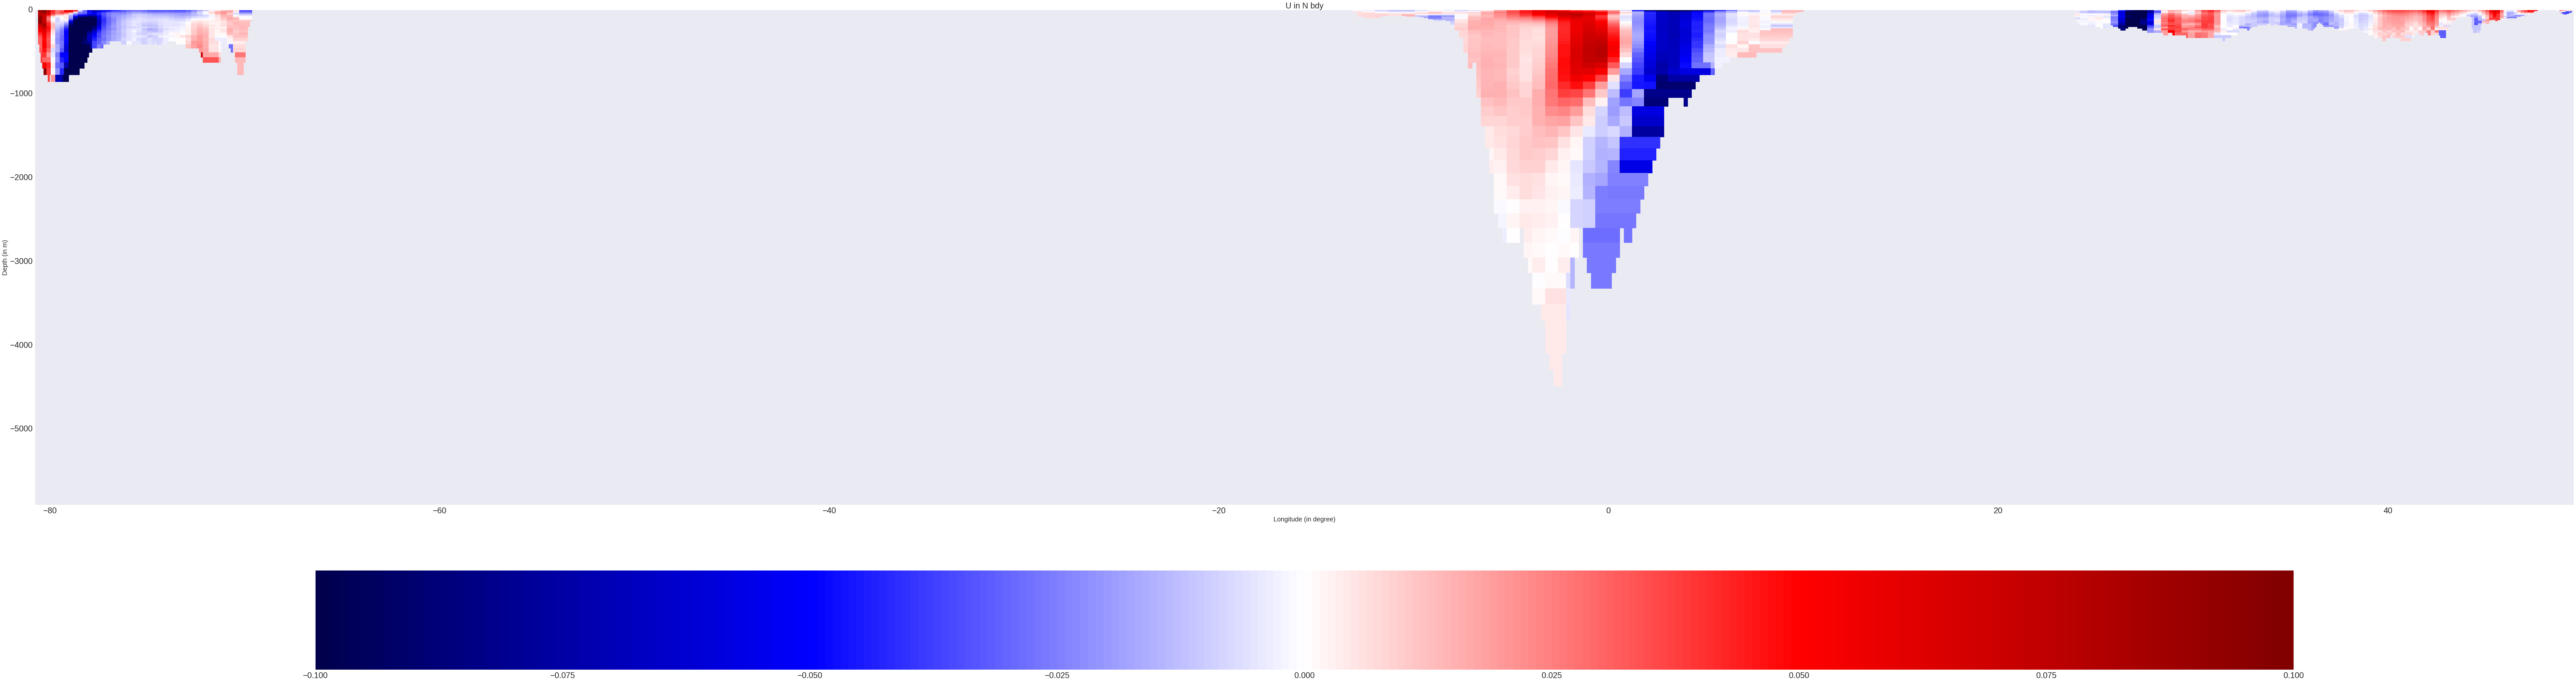

In [37]:
plt.figure(figsize=(140,80))
ax = plt.subplot(211)
ax.autoscale(tight=True)
pcolor = ax.pcolormesh(Nlon,Udepth,ma.masked_invalid(NU[0,:,0,:]),cmap=div_cmap,vmin=-0.1,vmax=0.1,alpha=1)
ax.tick_params(labelsize=25)
cbar = plt.colorbar(pcolor,orientation='horizontal',pad=0.1)
cbar.ax.tick_params(labelsize=35)
ax.set_xlabel('Longitude (in degree)',fontsize=20)
ax.set_ylabel('Depth (in m)',fontsize=20)
cbar.ax.tick_params(labelsize=25)
plt.title('U in N bdy',fontsize=25)